In [1]:
using XLSX, DataFrames

ENV["GKS_ENCODING"] = "utf-8"
using Plots
gr()

default(fontfamily="arial")

In [2]:
# exchange
rate = 7.7;

In [3]:
xf = XLSX.readxlsx("immoPrizo.xlsx")

XLSXFile("immoPrizo.xlsx") containing 3 Worksheets
            sheetname size          range        
-------------------------------------------------
             Overview 206x9         B3:J208      
                   eu 63x2          B3:C65       
                   cn 33x5          A1:E33       


In [4]:
eu = xf["eu"]["B6:C65"]
dfEu = DataFrame(:city=>String.(eu[:,1]), :price=>Float64.(eu[:,2]))

Row,city,price
,String,Float64
1,Geneva,15430.0
2,Zurich,13920.0
3,London,13750.0
4,Luxembourg,12000.0
5,Paris,10100.0
6,Munich,9870.0
7,Bern,8970.0
8,Amsterdam,8250.0
9,Stockholm,7790.0


In [5]:
cn = xf["cn"]["C3:E33"]
dfCn = DataFrame(:city=>String.(cn[:,1]), :price2=>Float64.(cn[:,2]), :price0=>Float64.(cn[:,3])) # 2nd-hand and new

Row,city,price2,price0
,String,Float64,Float64
1,上海,70527.0,57039.0
2,深圳,68003.0,63233.0
3,北京,63613.0,57773.0
4,厦门,47226.0,32266.0
5,广州,41435.0,42147.0
6,杭州,37699.0,25654.0
7,三亚,36499.0,31923.0
8,南京,28686.0,30490.0
9,天津,27703.0,22058.0


### 2nd-hand

In [6]:
# convert by exchange rate
dfCn.price = round.(dfCn.price2 ./ rate, digits=1);

In [7]:
# merge data eu and cn and sort by descending order
df = append!(dfEu, dfCn[:,[1,4]])
df1 = sort!(df, :price, rev=true)

Row,city,price
,String,Float64
1,Geneva,15430.0
2,Zurich,13920.0
3,London,13750.0
4,Luxembourg,12000.0
5,Paris,10100.0
6,Munich,9870.0
7,上海,9159.4
8,Bern,8970.0
9,深圳,8831.6


#### > 5k €/m²

In [8]:
df_eur1 = filter(:price => p -> p>5000, df1)

Row,city,price
,String,Float64
1,Geneva,15430.0
2,Zurich,13920.0
3,London,13750.0
4,Luxembourg,12000.0
5,Paris,10100.0
6,Munich,9870.0
7,上海,9159.4
8,Bern,8970.0
9,深圳,8831.6


In [9]:
# convert to k €
df_eur1.price ./= 1000

# of cities
len_eur1 = size(df_eur1, 1)

32

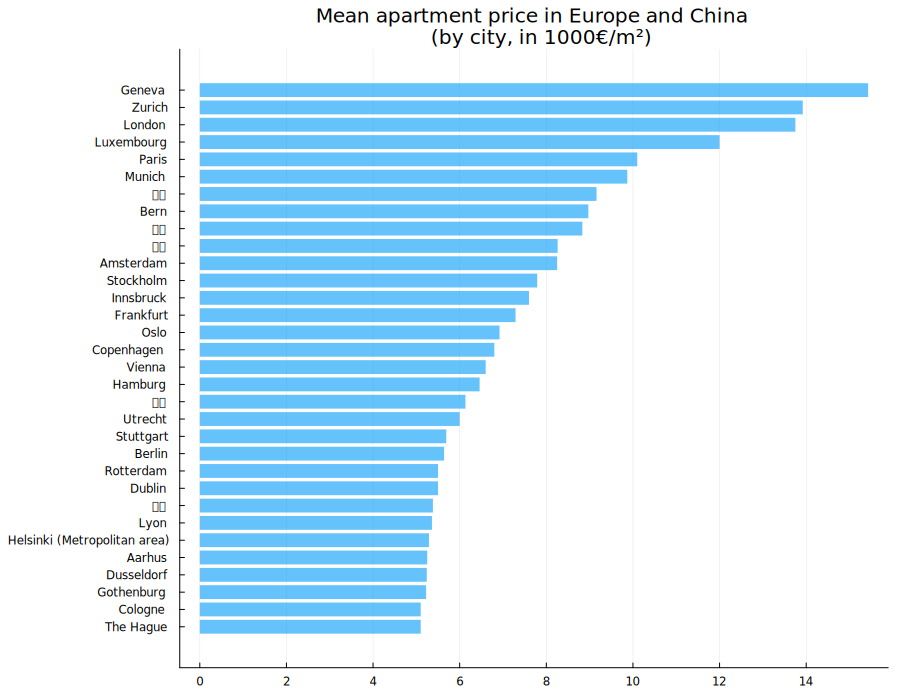

GKS: could not find font arial.ttf


In [10]:
b_eur1 = bar(df_eur1.price, leg=false, orientation=:horizontal,
    lw=0, w=0, alpha=0.6, size=(900, 700), 
    grid=:x, xticks=0:2:16,
    yflip=true, yticks=(1:len_eur1, df_eur1.city),
    title="Mean apartment price in Europe and China\n(by city, in 1000€/m²)")

#### < 5k

In [11]:
df_cny = filter(:price => p -> p<5000, df1)

df_cny.price .*= rate

df_cny.price ./= 10000

len_cny = size(df_cny, 1)

57

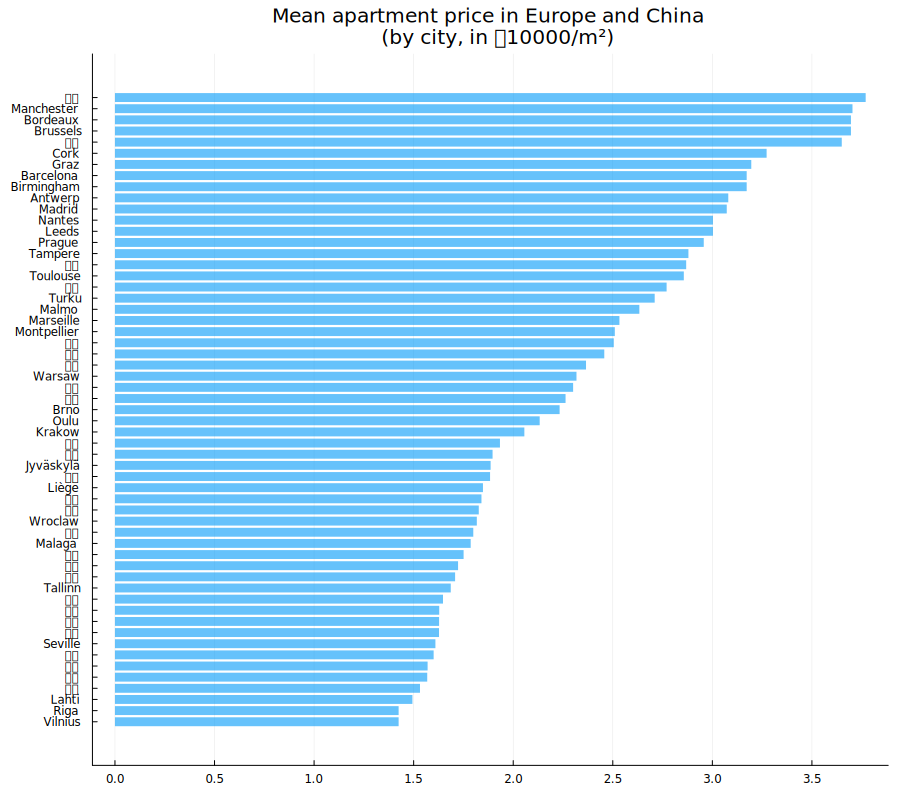

In [57]:
b_cny = bar(df_cny.price, leg=false, orientation=:horizontal,
    lw=0, w=0, alpha=0.6, size=(900, 800), 
    grid=:x, xticks=0:.5:4.,
    yflip=true, yticks=(1:len_cny, df_cny.city),
    title="Mean apartment price in Europe and China\n(by city, in ￥10000/m²)") 